In [32]:
import datetime
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import pandas as pd

In [33]:
pattern = re.compile(r".+([0-9]{4})([0-9]{2})([0-9]{2})\.xlsx")

In [68]:
name_excel = "../excel/tick_20250611.xlsx"
#ticker = "7011"
#ticker = "7203"
ticker = "8306"

m = pattern.match(name_excel)
if m:
    year = m.group(1)
    month = m.group(2)
    day = m.group(3)
else:
    year = "1970"
    month = "01"
    day = "01"
date_str = f"{year}-{month}-{day}"
df = pd.read_excel(name_excel, sheet_name=ticker)
df

,Time,Price
0,1.749600e+09,1965.0
1,1.749600e+09,1965.0
2,1.749600e+09,1966.0
3,1.749600e+09,1966.0
4,1.749600e+09,1964.0
...,...,...
19448,1.749623e+09,1956.0
19449,1.749623e+09,1956.0
19450,1.749623e+09,1955.5
19451,1.749623e+09,1955.5


In [69]:
df.index = pd.to_datetime([datetime.datetime.fromtimestamp(t) for t in df["Time"]])
df

,Time,Price
2025-06-11 09:00:01.244004,1.749600e+09,1965.0
2025-06-11 09:00:02.251473,1.749600e+09,1965.0
2025-06-11 09:00:03.248683,1.749600e+09,1966.0
2025-06-11 09:00:04.257191,1.749600e+09,1966.0
2025-06-11 09:00:05.252634,1.749600e+09,1964.0
...,...,...
2025-06-11 15:24:55.557153,1.749623e+09,1956.0
2025-06-11 15:24:56.559899,1.749623e+09,1956.0
2025-06-11 15:24:57.559862,1.749623e+09,1955.5
2025-06-11 15:24:58.550390,1.749623e+09,1955.5


In [70]:
# ローリングウィンドウサイズを設定 (秒単位)
# 例: 10秒間のRolling MAD
window_size = "30s" # '10s' = 10 seconds

# Rolling MAD の計算
# DataFrame.rolling().apply() を使う
# ここでは、ウィンドウ内の値の平均からの絶対偏差の平均を計算
df["rMAD"] = df["Price"].rolling(window=window_size).apply(
    lambda x: np.abs(x - x.mean()).mean(), raw=False
)
df

,Time,Price,rMAD
2025-06-11 09:00:01.244004,1.749600e+09,1965.0,0.000000
2025-06-11 09:00:02.251473,1.749600e+09,1965.0,0.000000
2025-06-11 09:00:03.248683,1.749600e+09,1966.0,0.444444
2025-06-11 09:00:04.257191,1.749600e+09,1966.0,0.500000
2025-06-11 09:00:05.252634,1.749600e+09,1964.0,0.640000
...,...,...,...
2025-06-11 15:24:55.557153,1.749623e+09,1956.0,0.138889
2025-06-11 15:24:56.559899,1.749623e+09,1956.0,0.115556
2025-06-11 15:24:57.559862,1.749623e+09,1955.5,0.138889
2025-06-11 15:24:58.550390,1.749623e+09,1955.5,0.160000


In [71]:
# ローリングウィンドウサイズを設定 (秒単位)
# 例: 1分間 (60秒) の価格レンジ
#window_size_range = "60s" # '60s' = 60 seconds

# Rolling Range の計算 (Max - Min)
df["rRange"] = df["Price"].rolling(window=window_size).apply(
    lambda x: x.max() - x.min(), raw=False
)
df

,Time,Price,rMAD,rRange
2025-06-11 09:00:01.244004,1.749600e+09,1965.0,0.000000,0.0
2025-06-11 09:00:02.251473,1.749600e+09,1965.0,0.000000,0.0
2025-06-11 09:00:03.248683,1.749600e+09,1966.0,0.444444,1.0
2025-06-11 09:00:04.257191,1.749600e+09,1966.0,0.500000,1.0
2025-06-11 09:00:05.252634,1.749600e+09,1964.0,0.640000,2.0
...,...,...,...,...
2025-06-11 15:24:55.557153,1.749623e+09,1956.0,0.138889,0.5
2025-06-11 15:24:56.559899,1.749623e+09,1956.0,0.115556,0.5
2025-06-11 15:24:57.559862,1.749623e+09,1955.5,0.138889,0.5
2025-06-11 15:24:58.550390,1.749623e+09,1955.5,0.160000,0.5


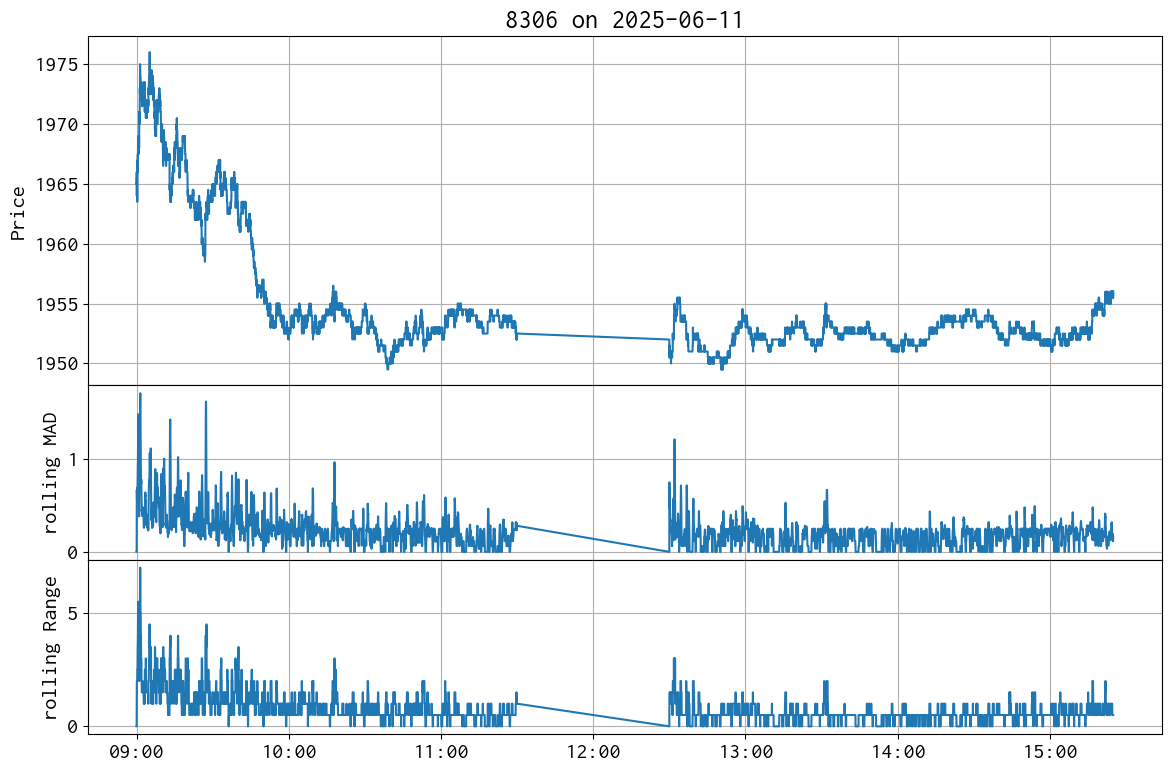

In [72]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(df["Price"])
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].set_ylabel("Price")
ax[0].set_title(f"{ticker} on {date_str}")

ax[1].plot(df["rMAD"])
ax[1].set_ylabel("rolling MAD")

ax[2].plot(df["rRange"])
ax[2].set_ylabel("rolling Range")

plt.tight_layout()
plt.savefig(f"screenshots/tick_{ticker}_{date_str}.png" )
plt.show()